# Introduction

Bivariate numerical data involves two variables in a dataset. Relationship between two variables can be visualized using a **scatter plot** and measured using a metric called **correlation coefficient**.

Let's setup our environment.

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import math

matches = pd.read_csv('../input/matches.csv')
deliveries = pd.read_csv('../input/deliveries.csv')

# Scatter plot

Scatter plots help us see relationship between variables. We can infer by looking at the plot, whether there is a positive or negative or no association between the variables. Following is a sample scatter plot between **Variable A** and **Variable B**.

![Scatter plot sample](https://nowke.github.io/stats/images/scatter-plot-sample.svg)

We can see that there is a ***positive association*** between **Variable A** and **Variable B**. i.e. Variable A increases as variable B increases.

Some datasets many contain a few data points that doesn't fit the pattern. They're called outliers.

![Scatter plot outliers](https://nowke.github.io/stats/images/scatter-plot-outliers.svg)

# Correlation

## Positive correlation 

A positive correlation exists between two variables A and B when A increases, B also increases and B decreases when A decreases. Graph between A and B would look like the following.

![Positive correlation](https://nowke.github.io/stats/images/positive-correlation.svg)

***Examples***
* Height v/s Weight of a person
* Walking distance v/s calories burnt
* Product quality v/s sales

## Perfect Positive correlation

A perfect positive correlation exists if there is a positive linear association between two variables. Which means, given variable A, we can exactly predict the value of B by multiplying with a positive number.

![Perfect positive correlation](https://nowke.github.io/stats/images/perfect-positive-correlation.svg)

***Examples***
* Length of a square v/s it’s circumference
* Weight in kilos v/s weight in pounds

## Negative correlation

A negative correlation exists between two variables A and B, if A decreases when B increases and A increases when B decreases.

![Negative correlation](https://nowke.github.io/stats/images/negative-correlation.svg)

***Examples***
* Mobile screen time v/s remaining battery percentage
* Current run rate v/s Required run rate (in Cricket)

## Perfect Negative correlation

A perfect negative correlation exists if there is a negative linear association between two variables.

![Perfect Negative correlation](https://nowke.github.io/stats/images/perfect-negative-correlation.svg)

***Examples***
* Power v/s focal length of a lens
* Frequency v/s wavelength of light

## Zero correlation

If two variables are independent of each other, then there is no correlation or zero correlation.

![Zero correlation](https://nowke.github.io/stats/images/zero-correlation.svg)

***Examples***
* Bitcoin price v/s speed of light
* Your mobile usage per day v/s neighbor’s electricity bill

# Correlation coefficient

Correlation coefficient $r$ measures the linear correlation between variables.
* Value is between -1 to +1
* Value closer to 1 &rarr; Strong positive linear relationship
* Value closer to -1 &rarr; Strong negative linear relationship
* Value cloesr to 0 &rarr; weak relationship

Formula for calculating correlation coefficient between $x = (x_1, x_2, ..., x_n)$ and $y = (y_1, y_2, ..., y_n)$ is given by,

\begin{align}
r = {1 \over n-1} \sum{({x_i - \bar{x} \over \sigma_x}) \cdot ({y_i - \bar{y} \over \sigma_y})}
\end{align}

In terms of z-score,

\begin{align}
r = {1 \over n-1} \sum{z_{x_i} \cdot z_{y_i}}
\end{align}

Let's draw a scatter plot between **X = Total runs scored** and **Y = highest score by a batsman** in an innings

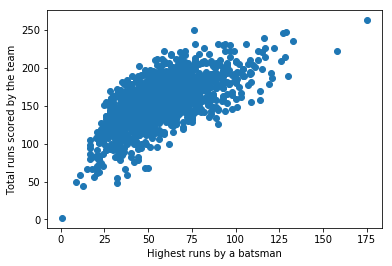

In [0]:
highest_score_batsman = deliveries.groupby(['match_id', 'batting_team', 'batsman']) \
                                  .batsman_runs \
                                  .agg([np.sum]) \
                                  .max(level = ['match_id', 'batting_team'])

total_runs = deliveries.groupby(['match_id', 'batting_team']) \
                       .total_runs \
                       .agg([np.sum])

match_total_highest_combined = pd.concat([highest_score_batsman, total_runs], axis=1)
match_total_highest_combined_list = []
for name in match_total_highest_combined.index:
    match_total_highest_combined_list.append({
        "highest": match_total_highest_combined.loc[name].tolist()[0],
        "total": match_total_highest_combined.loc[name].tolist()[1]
    })

total_highest_df = pd.DataFrame.from_records(match_total_highest_combined_list)
pyplot.scatter(total_highest_df.highest, total_highest_df.total)
pyplot.xlabel("Highest runs by a batsman")
pyplot.ylabel("Total runs scored by the team")
pyplot.show()

Let's calculate the **correlation coefficient** between X and Y.

In [0]:
# Use `.corr` method
corr = total_highest_df.highest.corr(total_highest_df.total)
print(f'Correlation between "Highest runs by a batsman" and "Total runs scored by the team" is {corr}')

Correlation between "Highest runs by a batsman" and "Total runs scored by the team" is 0.6580911324218259


We get a correlation coefficient of **0.658**. As we can observe from the graph and infer from the number, there's a **positive correlation**.

# Covariance

Covariance is another measure of joint variability between two random variables. It is calculated as,

\begin{align}
Covariance(x, y) = {1 \over n - 1} \cdot {\sum_{i=1}^n (x_i - \bar{x}) \cdot (y_i - \bar{y})} = E[XY] - \mu_x\mu_y
\end{align}

Correlation in terms of covariance is given by,

\begin{align}
Correlation(x, y) = {Covariance(x, y) \over \sigma_x \cdot \sigma_y}
\end{align}

In [0]:
# Use `.cov` method
cov = total_highest_df.highest.cov(total_highest_df.total)
print(f'Covariance between "Highest runs by a batsman" and "Total runs scored by the team" is {cov}')

Covariance between "Highest runs by a batsman" and "Total runs scored by the team" is 440.2140352512807


We can verify the same using the above formula.

In [0]:
corr * total_highest_df.highest.std() * total_highest_df.total.std()

440.21403525128102

# Least squares regression

We can fit an approximate line for the scatter plot by a method called **least squares regression**. This can be helful in predicting unknown values. 

A line is represented by the equation $y = mx + b$.

Formula for the slope, **$m$** is given by,

\begin{align}
m = r \cdot {\sigma_y \over \sigma_x}
\end{align}

The line would go through the coordinates $(\bar{x}, \bar{y})$. Hence substituting $\bar{x}$ and $\bar{y}$ gives us the value for $b$.

\begin{align}
b = \bar{y} - m \cdot \bar{x}
\end{align}

Let's find out the equation for the best-fit line for our scatter plot.

In [0]:
# Step 1: Find slope
m = corr * total_highest_df.total.std() / total_highest_df.highest.std()
print(f'Slope, m = {m}')

# Step 2: Find (x_bar, y_bar)
x_bar, y_bar = total_highest_df.highest.mean(), total_highest_df.total.mean()
print(f'(x_bar, y_bar) = ({x_bar}, {y_bar})')

# Step 3: Find intercept
b = y_bar - m * x_bar
print(f'Intercept, b = {b}')

# Equation of the line
print(f'Equation of the line is y = {m:.2f}x + {b:.2f}')

Slope, m = 0.9850744638427754
(x_bar, y_bar) = (56.96115107913669, 154.69064748201438)
Intercept, b = 98.57967212286647
Equation of the line is y = 0.99x + 98.58


Let's plot the line along with the scatter plot

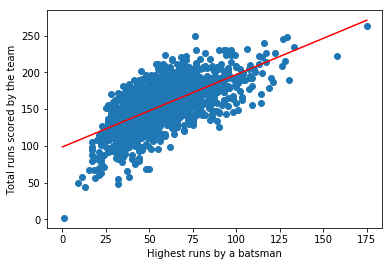

In [0]:
pyplot.scatter(total_highest_df.highest, total_highest_df.total)
pyplot.xlabel("Highest runs by a batsman")
pyplot.ylabel("Total runs scored by the team")

# Two points (x1, y1), (x2, y2) that follows the eqn y = mx + b
(x1, y1), (x2, y2) = (0, b), (175, 175*m + b)
pyplot.plot([x1, x2], [y1, y2], 'r-')
pyplot.show()

## Coefficient of determination (R-squared)

**Coefficient of determination** or **R-squared** is a measure of how close the data are fitted in the regression line. It is calculated as the square of correlation coefficient (r)

\begin{align}
Coefficient\,of\,determination = r^2
\end{align}

In [0]:
r_squared = corr * corr
print(f'R-squared = {r_squared:.2f}')

R-squared = 0.43


i.e. we have a variability of **43%** in our best-fit line

## Root mean square error (RMSE)

**Residuals** are a measure of how far from the regression line data points are. **Root mean square error (RMSE)** is the standard deviation of the residuals. It is given by,

\begin{align}
RMSE = \sqrt{{1 \over n} \cdot \sum{(y_i - \hat{y})^2}}
\end{align}

In terms of R-squared,

\begin{align}
RMSE = \sqrt{1 - r^2} \cdot \sigma_y
\end{align}

In [0]:
rmse = math.sqrt(1 - r_squared) * total_highest_df.total.std()
print(f'Root mean square error = {rmse}')

Root mean square error = 23.825378828608905


While **RMSE** is an absolute measure, **R-squared** is a relative measure (value between 0 to 1).